<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">0.0 About Author</h1>
</div>
<pre>
Muhammad Atif Student at Islamiya Universty Of Bahawalpur
Aspiring data Science Student
Your can visit my profiles like <mark>LinkdIn</mark> and <mark>GitHub</mark>
Just Click on Given button:
</pre>
<label>LinkdIn:</label>
<p>
<a href="https://www.linkedin.com/in/muhammad-atif-058a5439b/">
<button style="color:white;background-color:blue">LinkdIn</button></a><br></p>
<label>GitHub:</label>
<p>
<a href="https://github.com/Atif-eng">
<button style="color:white;background-color:Black">GitHub</button></a></p>

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">0.1 About Project</h1>
</div>
<h4 style="color:#690606ff">Project Title</h4>
House Price Prediction
<h4 style="color:#690606ff">Task</h4>
Predict houseprice 

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">1.0 Data Preprocessing</h1>
</div>

<h3 style="color:#690606ff">1.1 Import Required Libraries</h3>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikitlearn
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
# evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

# ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

<h3 style="color:#690606ff">1.2 Load Dataset</h3>

In [17]:
# test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print("train_shape: ",train.shape)
print("test_shape: ",test.shape)

train_shape:  (1460, 81)
test_shape:  (1459, 80)


<h3 style="color:#690606ff">1.3 Data Overview</h3>

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [20]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [21]:
test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [22]:
train.duplicated().sum()

np.int64(0)

<h3 style="color:#690606ff">1.4 Statistical Analysis</h3>

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">2.0 Handle Missing Value</h1>
</div>

In [25]:
missing=train.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [71]:
# handling categorical features
for df in [train, test]:
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [27]:
train.isna().sum().sum()

np.int64(0)

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">3.0 Visualization Analysis</h1>
</div>

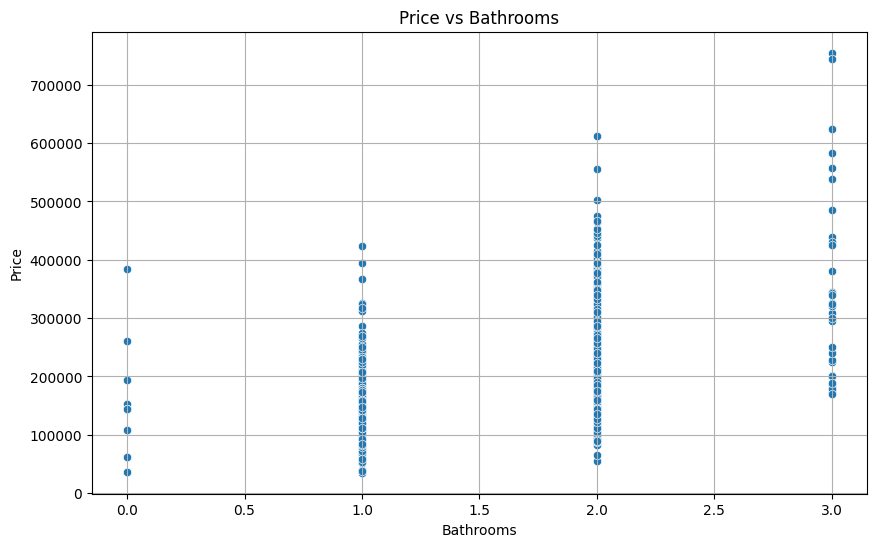

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FullBath', y='SalePrice', data=train)
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

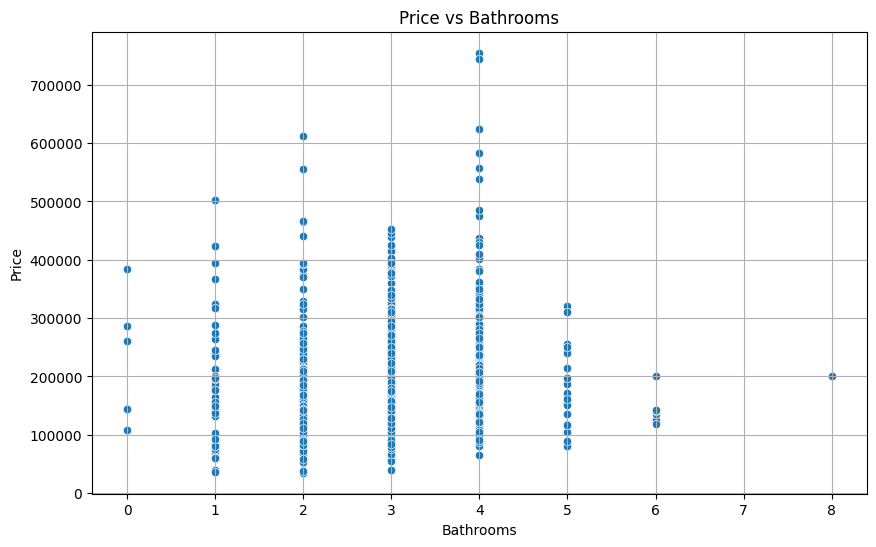

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=train)
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

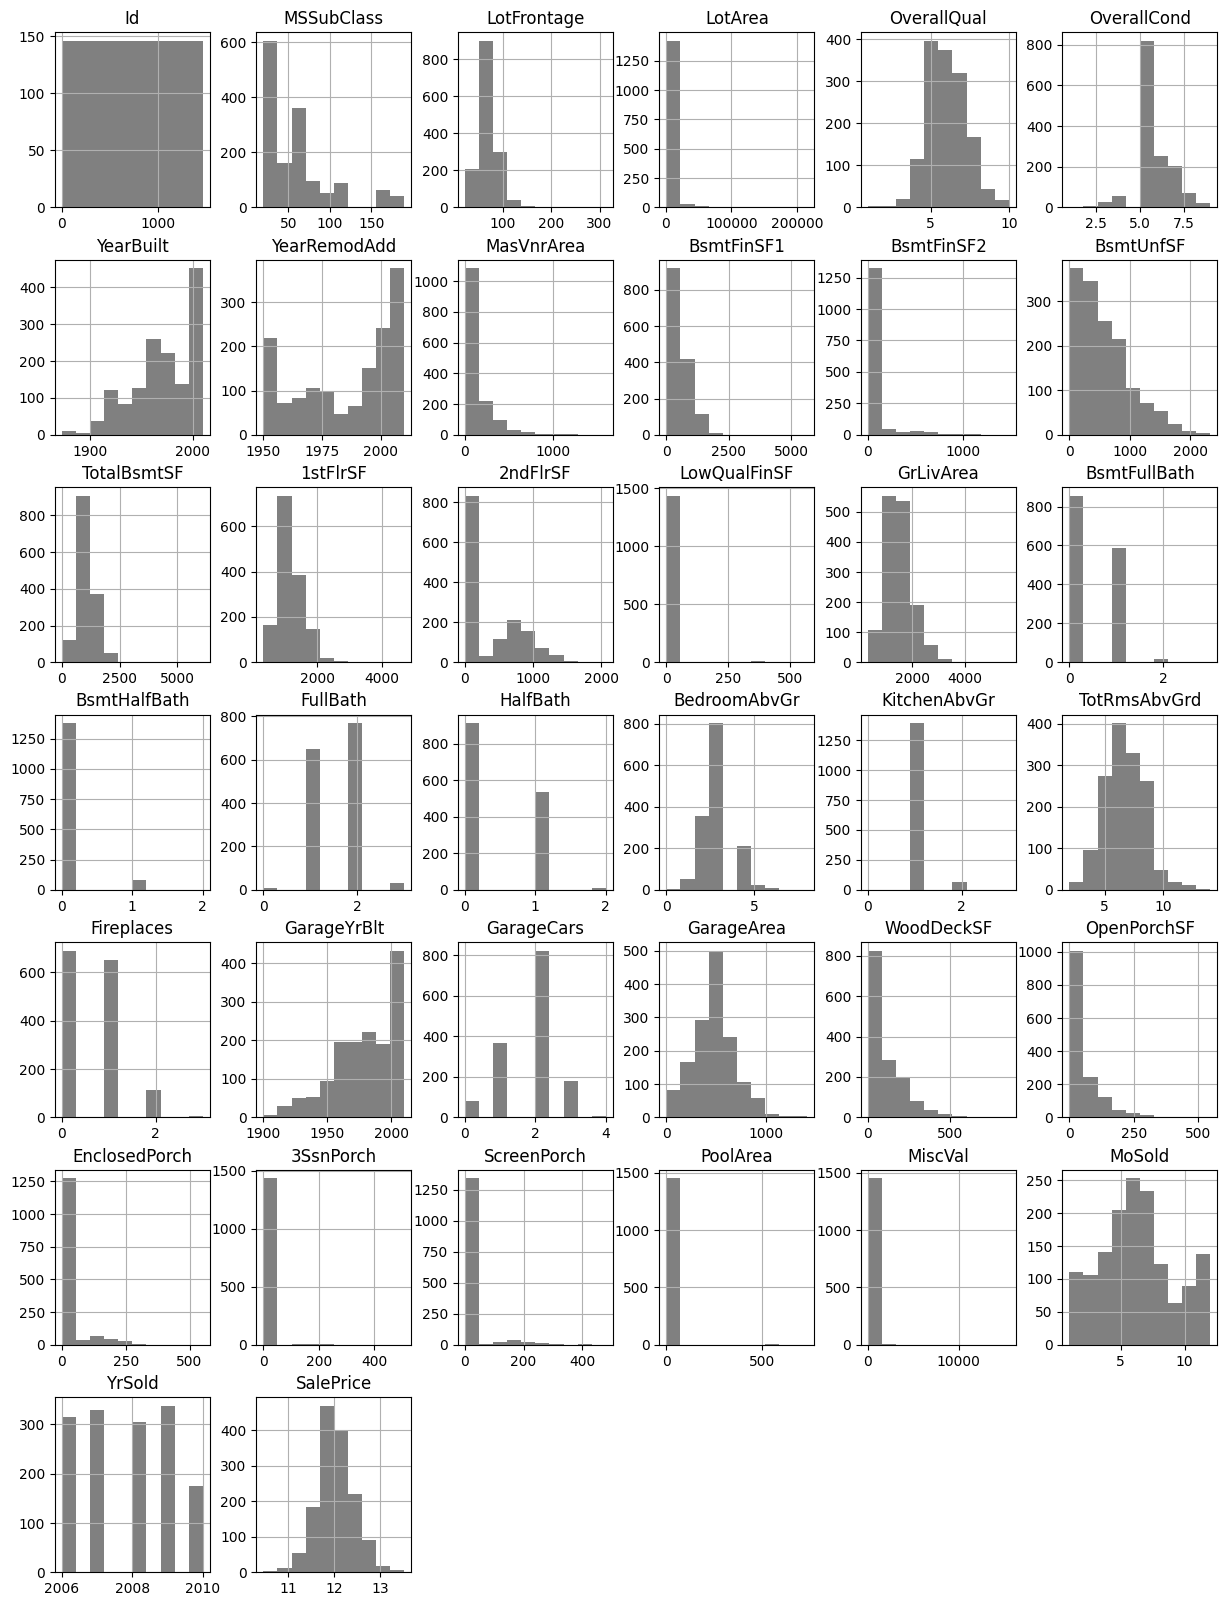

In [66]:
train.hist(figsize=(15, 20), xlabelsize=10, ylabelsize=10,color='gray');

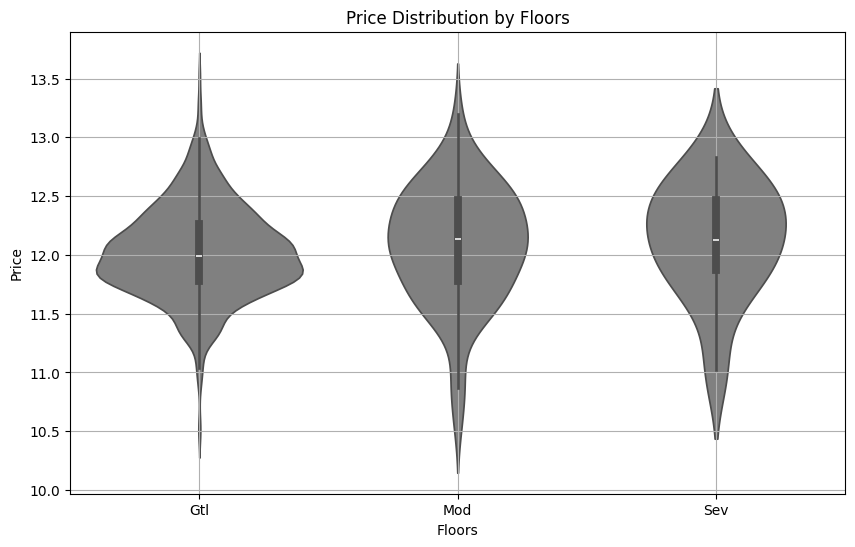

In [70]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='LandSlope', y='SalePrice', data=train,color="gray")
plt.title('Price Distribution by Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

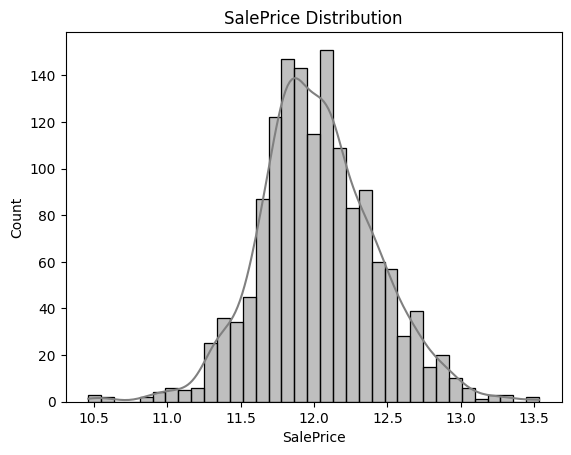

In [68]:
sns.histplot(train['SalePrice'], kde=True,color="gray")
plt.title("SalePrice Distribution")
plt.show()

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">4.0 Data Encoding</h1>
</div>

In [33]:
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)

obj_cols = all_data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in obj_cols:
    all_data[col] = le.fit_transform(all_data[col])

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">5.0 Transformation</h1>
</div>

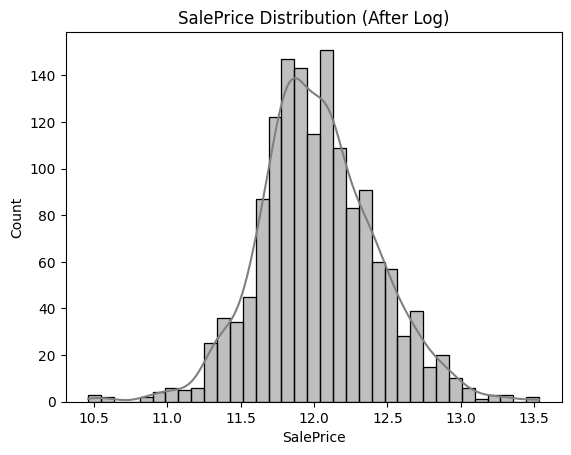

In [34]:
#log transformation
train["SalePrice"] = np.log(train["SalePrice"])

sns.histplot(train['SalePrice'], kde=True, color="gray")
plt.title("SalePrice Distribution (After Log)")
plt.show()

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">5.0 Data Scaling</h1>
</div>

In [59]:
scalar=StandardScaler()
for col in all_data.select_dtypes(include=["int64","float64"]).columns:
    all_data[col]=scalar.fit_transform(all_data[[col]])

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">6.0 Feature Selection</h1>
</div>

In [50]:
X = all_data.iloc[:train.shape[0], :].drop('Id', axis=1)
y = train['SalePrice']

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">7.0 Models</h1>
</div>

In [51]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=1000, learning_rate=0.05, verbose=-1, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">8.0 Best Model Selection</h1>
</div>

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Starting Cross-Validation (This may take a minute)...\n")

results = {}

for name, model in models.items():
    # We use 'neg_root_mean_squared_error' because sklearn scoring maximizes utility (higher is better),
    # so error metrics are negative. We negate them back to positive for readability.
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
    
    # Calculate average RMSE and Standard Deviation
    avg_rmse = -np.mean(cv_results)
    std_rmse = np.std(cv_results)
    
    results[name] = avg_rmse
    print(f"{name}: Average RMSE = {avg_rmse:.4f}  (Std: {std_rmse:.4f})")

# 4. SELECT BEST MODEL ----
best_model_name = min(results, key=results.get)
print(f"\nBest Model for this dataset is: {best_model_name} with RMSE: {results[best_model_name]:.4f}")

Starting Cross-Validation (This may take a minute)...

Random Forest: Average RMSE = 0.1451  (Std: 0.0203)
XGBoost: Average RMSE = 0.1384  (Std: 0.0203)
LightGBM: Average RMSE = 0.1358  (Std: 0.0201)
CatBoost: Average RMSE = 0.1256  (Std: 0.0181)

Best Model for this dataset is: CatBoost with RMSE: 0.1256


<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">9.0 Fit Model</h1>
</div>

In [53]:
# Using robust parameters. You can also use the result of your GridSearchCV here.
cat_model = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.05, 
    depth=6, 
    l2_leaf_reg=3,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate RMSE scores using Cross-Validation
cv_scores = cross_val_score(cat_model, X, y, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative scores to positive and print average
avg_rmse = -np.mean(cv_scores)
print(f"✅ Cross-Validation RMSE: {avg_rmse:.5f}")
print(f"   (This is your model's true accuracy on unseen data)")

print("\nTraining final model on full dataset...")
cat_model.fit(X, y)

✅ Cross-Validation RMSE: 0.12458
   (This is your model's true accuracy on unseen data)

Training final model on full dataset...


<div style="border-radius: 30px 0px 30px 0px; border: 2px solid #3e3f3fff; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: #690606ff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">10.0 Final Submission</h1>
</div>

In [55]:
X_test = all_data.iloc[train.shape[0]:, :]
final_predictions = cat_model.predict(X_test.drop('Id', axis=1))

submission = pd.DataFrame({
    'Id': X_test['Id'],
    'SalePrice': final_predictions
})

submission.to_csv('submission_catboost.csv', index=False)
print("🎉 'submission_catboost.csv' saved successfully!")

🎉 'submission_catboost.csv' saved successfully!
